# Alumno: Gerardo de Miguel González

1.- Crea una función a la que se le pase como input: la media en el eje x, la media en el eje y, la varianza en el eje x, la varianza en el eje y y la covarianza de x e y, junto con un número de puntos N, y devuelva una matriz con N filas y 2 columnas con los números que salen de la distribución gaussiana de dos dimensiones definidas por los valores de input (usar la función MASS::mvrnorm)

In [37]:
library('MASS')

In [38]:
#::GMG::Defino la función con las medias separadas pero las varianzas
#       agrupadas en la matriz de covarianzas en la que las varianzas
#       de X e Y están en la diagonal y las covarianzas en la diagonal
#       inversa de la matriz 2x2 cov_xy
gauss_2d <- function (mu_x, mu_y, cov_xy, n) {
    mu_2d <- c(mu_x, mu_y)
    return(mvrnorm(n = n, mu = mu_2d, Sigma = cov_xy))
}

2.- Genera una matrix x1 usando la función anterior y tomando: N = 1000, mu_x = 2, mu_y = 4, var_x = var_y = 1, y Cov(x,y) = 0.3. Crea una matriz “y1” con tantas filas como la matriz x y asígnale el valor 0. 

In [39]:
#::GMG::Usamos la función anterior
set.seed(1)
X_1 <- gauss_2d(mu_x = 2, 
                mu_y = 4, 
                cov_xy = matrix(data = c(1,0.3,0.3,1), ncol = 2),
                n = 1000)
str(X_1)
head(X_1)

 num [1:1000, 1:2] 0.823 1.49 1.841 3.161 2.225 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL


0.8234824,4.166391
1.4902302,4.805886
1.8414537,2.811136
3.1614860,5.410827
2.2246026,4.306713
2.3221536,2.354881


In [40]:
Y_1 <- matrix(data = c(rep(0, nrow(X_1))))
str(Y_1)
head(Y_1)

 num [1:1000, 1] 0 0 0 0 0 0 0 0 0 0 ...


0
0
0
0
0
0


3.- Repite 2) para otra muestra con N = 1000, mu_x = 6, mu_y = 3, var_x = var_y = 1, y Cov(x,y) = 0.3. Crea una matriz “y2” con tantas filas como la matriz x2 y asígnale el valor 1.

In [41]:
#::GMG::De nuevo usamos la función del primer punto
set.seed(1)
X_2 <- gauss_2d(mu_x = 6, 
                mu_y = 3, 
                cov_xy = matrix(data = c(1,0.3,0.3,1), ncol = 2),
                n = 1000)
str(X_2)
head(X_2)

 num [1:1000, 1:2] 4.82 5.49 5.84 7.16 6.22 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : NULL


4.823482,3.166391
5.490230,3.805886
5.841454,1.811136
7.161486,4.410827
6.224603,3.306713
6.322154,1.354881


In [42]:
Y_2 <- matrix(data = c(rep(1, nrow(X_2))))
str(Y_2)
head(Y_2)

 num [1:1000, 1] 1 1 1 1 1 1 1 1 1 1 ...


1
1
1
1
1
1


4.-Junta las matrices x1, x2, y y1, y2 en una sola matriz x y una sola matriz y.

In [43]:
X <- rbind(X_1, X_2)
str(X)
head(X)

 num [1:2000, 1:2] 0.823 1.49 1.841 3.161 2.225 ...


0.8234824,4.166391
1.4902302,4.805886
1.8414537,2.811136
3.1614860,5.410827
2.2246026,4.306713
2.3221536,2.354881


In [44]:
Y <- rbind(Y_1, Y_2)
str(Y)
head(Y)

 num [1:2000, 1] 0 0 0 0 0 0 0 0 0 0 ...


0
0
0
0
0
0


5.- Usando las funciones de coste y gradiente del ejercicio 4, utiliza optim para un modelo en el que z = alpha_0 + alpha_1 x1 + alpha_2 x2, tomando como vector de parámetros inicial el (0, 0, 0). Calcula y pinta la frontera entre ambas distribuciones. 

In [45]:
#::GMG::Función sigmoide
sigmoid = function(z) {
   1 / (1 + exp(-z))
}

In [46]:
#::GMG::Función de coste de regresión logística con sigmoid
#       siguiendo la notación de loa apuntes, slide 10, Chapter 4
#       Ponemos los coeficientes en un vector de alphas
#       alpha_0, alpha_1, ..., alpha_p 
#       alpha_0 + alpha_1 * x_1 + ... + alpha_p * x_p
#       x es la matriz de features (1, x_i)
loss <- function(x, y, alpha) {
    s <- sigmoid(z = x %*% alpha)
    return(- sum(y * log(s) + (1-y) * log(1-s)) / nrow(x))
}

In [47]:
#::GMG::Gradiente del coste según los apuntes (slide 11, Chapter 4)
gradiente <- function(x, y, alpha) {
    return((t(t(sigmoid(z = x %*% alpha) - y) %*% x)) / nrow(x))
}

In [48]:
#::GMG::Calculo los parámatros alphas óptimos con optim()
# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/optim.html
# https://magesblog.com/post/2013-03-12-how-to-use-optim-in-r/
alpha_0 <- c(0,0,0)
alpha_opt <- optim(
    par=alpha_0, 
    x=cbind(1,X), 
    y=Y, 
    fn=loss, 
    gr=gradiente, 
    method='BFGS'
)

In [49]:
print(alpha_opt$par)

[1] -10.575221   4.635436  -2.273484


In [77]:
#::GMG::Necesito la recta se separación
#::DUDA::Esto NO lo entiendo muy bien
# z <- alpha_0 + alpha_1 * x_1 + alpha_2 * x_2
# x_2 <- (z - alpha_0 - alpha_1 * x_1)/alpha_2
recta <- function(alpha, x_1, z) {
    return((z - alpha[1] - alpha[2]*x_1)/alpha[3])
}

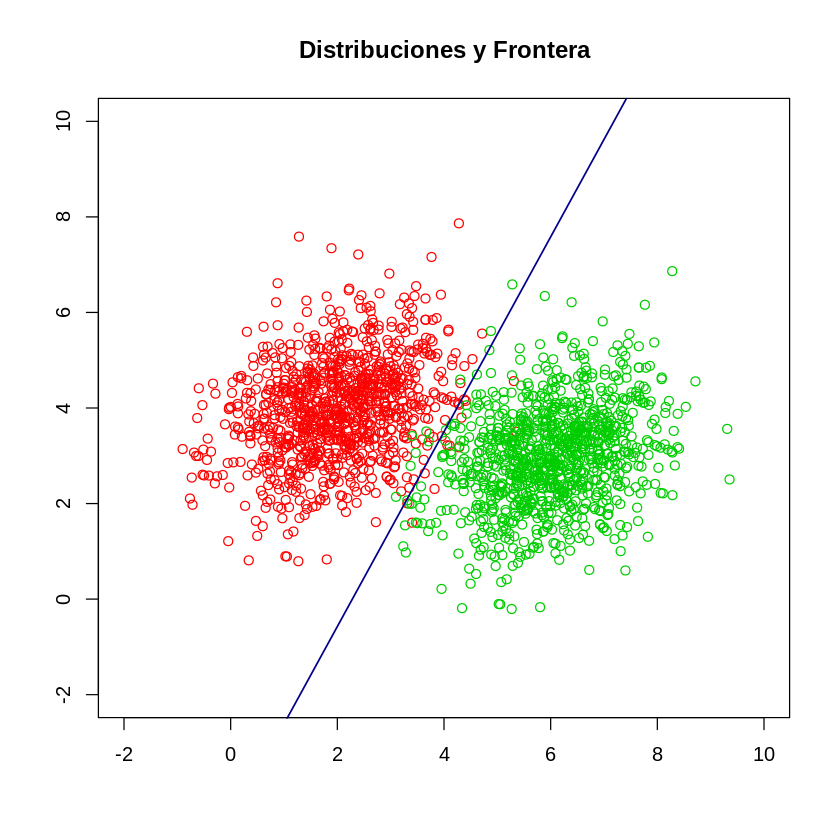

In [79]:
#::GMG::Dibujo las distribuciones y la frontera
# https://stackoverflow.com/questions/7466023/how-to-give-color-to-each-class-in-scatter-plot-in-r
plot (X, col = Y+2, 
      xlim =c(-2,10) , ylim =c(-2,10),
      xlab ='', ylab = '',
      main='Distribuciones y Frontera')
lines(c(0,10), c(recta(alpha_opt$par, 0, 0), recta(alpha_opt$par, 10, 0)), 
      col='darkblue', lwd=1.4)

6.- Repite otra vez 1, 2, 3 y 4 para obtener otras matrices x e y independientes. Utilizando la “sigma” calculada anteriormente calcula el TPR, TNR, FPR y FNR para valores del threshold = 0.3, 0.5, 0.7.  

In [ ]:
#::GMG::Pendiente